In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading of data
df=pd.DataFrame({"Weight":[45,58,48,60,70,78,80,90,95,78,82,95,105,100,85,78,50,65,76,87,45,56,72],"Height":[120,135,123,145,160,162,163,175,182,170,176,182,175,183,170,177,140,159,150,167,129,140,160]})

In [ ]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


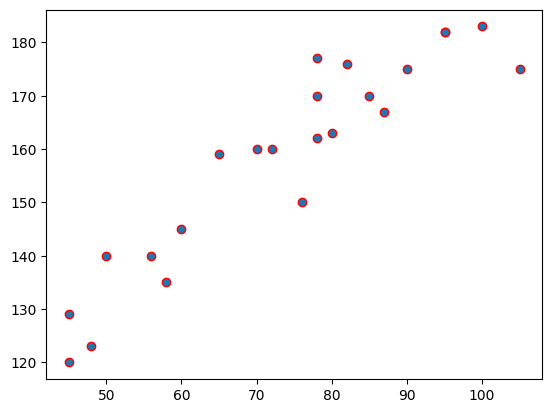

In [ ]:
plt.scatter(df.Weight,df.Height,edgecolors="red")

In [ ]:
#divide the data into x,y
x=df[['Weight']]
y=df['Height']

In [ ]:
x,y

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
 0     120
 1     135
 2     123
 3     145
 4     160
 5     162
 6     163
 7     175
 8     182
 9     170
 10    176
 11    182
 12    175
 13    183
 14    170
 15    177
 16    140
 17    159
 18    150
 19    167
 20    129
 21    140
 22    160
 Name: Height, dtype: int64)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape,y_train.shape

((18, 1), (18,))

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[-1.4611864 ],
       [ 0.44730196],
       [-0.26838118],
       [-1.58046693],
       [ 0.08946039],
       [ 0.32802144],
       [ 0.92442405],
       [-0.98406431],
       [ 0.62622274],
       [-1.75938771],
       [ 0.20874091],
       [-0.14910065],
       [-1.10334484],
       [ 0.20874091],
       [ 1.22262536],
       [ 1.81902797],
       [ 1.22262536],
       [ 0.20874091]])

In [ ]:
x_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

In [ ]:
#model training
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([17.73635106])

In [ ]:
reg.intercept_

158.88888888888889

In [ ]:
y_pred_test=reg.predict(x_test)
y_pred_test

array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
       172.11139655])

In [ ]:
#y_pred=17.73635106 * x_train + 158.88888888888889

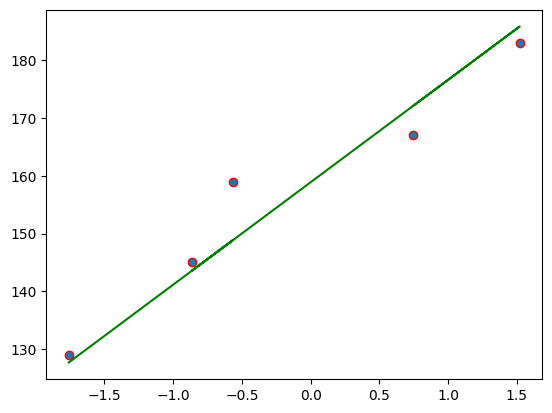

In [ ]:
plt.scatter(x_test,y_test,edgecolors="red")
plt.plot(x_test,y_pred_test,c="g")

In [ ]:
y_pred_train=reg.predict(x_train)
y_pred_train

array([132.97277388, 166.82239348, 154.12878613, 130.85717266,
       160.47558981, 164.70679226, 175.28479838, 141.43517878,
       169.99579532, 127.68377082, 162.59119103, 156.24438736,
       139.31957756, 162.59119103, 180.57380145, 191.15180757,
       180.57380145, 162.59119103])

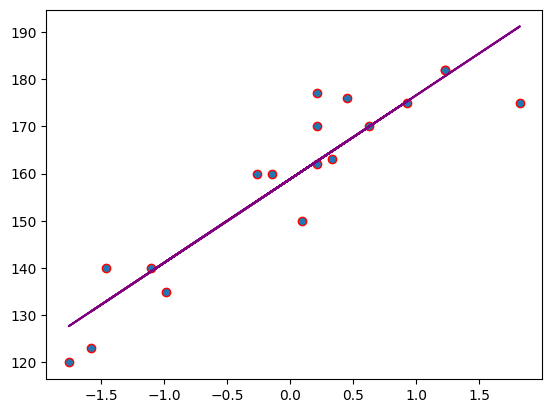

In [ ]:
plt.scatter(x_train,y_train,edgecolors="red")
plt.plot(x_train,y_pred_train,c="purple")

In [ ]:
#Evaluation matrices
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(f"mean_squared_error:{mean_squared_error(y_test,y_pred_test)}")
print(f"mean_absolute_error:{mean_absolute_error(y_test,y_pred_test)}")
print(f"r2_score:{r2_score(y_test,y_pred_test)}") #85% of y is explained by X, rquare 0 to 1

mean_squared_error:28.276946048811972
mean_absolute_error:4.179973432576932
r2_score:0.9171832648523548


In [ ]:
score=r2_score(y_test,y_pred_test)
score

0.9171832648523548

In [ ]:
#adj rsquare = 1-(1-rsq)*N-1/n-p-1
1-(1-score)*(len(y_test)-1) / (len(y_test) - x_test.shape[1] -1)

0.8895776864698064